<a href="https://colab.research.google.com/github/namrathakilari/My_Journey_of_AIML/blob/main/PROJECTS/K-NN%20classification%20of%20iris%20dataset/K_NN_Classification_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***K-NN Classification with PCA on the Iris Dataset***


This project demonstrates the complete Machine Learning workflow using the iris dataset from sklearn.datasets.

It includes data exploration, visualization, preprocessing, model training, hyperparameter tuning, and dimensionality reduction (PCA).

***Project Overview***

Predicting the Iris species (setosa, versicolor, virginica) using K-Nearest Neighbors (K-NN).

Comparing model performance before and after applying PCA for dimensionality reduction.

Visualizing class distribution, feature relationships, and decision boundaries.


1️⃣ **Load and Explore the Dataset**

Dataset: sklearn.datasets.load_iris()

Features: sepal length, sepal width, petal length, petal width

Target: species (0=setosa, 1=versicolor, 2=virginica)

Visualizations:

Countplot: Shows class distribution

Boxplot: Detect outliers in features

Correlation Heatmap: Feature correlations

Purpose: Understand the dataset and detect potential issues before modeling.


2️⃣ **Data Preprocessing**

Train-test split: 80/20 with stratify=y to maintain class balance

Standardization: StandardScaler() to scale features (important for K-NN)

Purpose: Normalize data so that all features contribute equally to distance calculations in K-NN.


3️⃣ **K-NN Hyperparameter Tuning**

Evaluated k values from 1 to 20 using 5-fold cross-validation

Plotted k vs. accuracy to choose the best k

Outcome: Selected best_k based on highest cross-validated accuracy.


4️⃣ **Train and Evaluate K-NN (Before PCA)**

Trained K-NN classifier using best_k

Evaluated model using:

Accuracy

Classification report (precision, recall, F1-score)

Confusion matrix (visualized with heatmap)

Purpose: Establish baseline performance before dimensionality reduction.


5️⃣** Principal Component Analysis (PCA)**

Performed PCA to reduce features to 2 dimensions (n_components=2)

Explained variance ratio plotted to check how much variance each component captures

Transformed train and test data to PCA space

Purpose: Reduce dimensionality while preserving most variance and visualize decision boundaries in 2D.

6️⃣ **Train and Evaluate K-NN (After PCA)**

Trained K-NN on 2D PCA-transformed data

Evaluated performance:

Accuracy

Classification report

Confusion matrix (visualized in green heatmap)

Observation: Accuracy may slightly decrease due to information loss in dimensionality reduction, but PCA provides simpler visualization and insight.

7️⃣ **Visualization**

2D PCA scatterplot of classes (training data) using matplotlib

Decision boundary plot (test data) showing how K-NN classifies the 2D PCA space

Color mapping for species:

Setosa → Green

Versicolor → Red

Virginica → Blue

Purpose: Understand model behavior visually, show class separation in PCA space, and inspect classifier boundaries.

8️⃣ **Key Takeaways**

K-NN is sensitive to feature scaling; standardization is crucial.

PCA helps reduce dimensionality for visualization without losing much information.

Decision boundaries show how K-NN classifies new points in reduced 2D space.

Iris dataset is well-separated, which allows high K-NN accuracy.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", y.value_counts())

Dataset shape: (150, 4)
Target classes: 0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


/tmp/ipython-input-236728510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


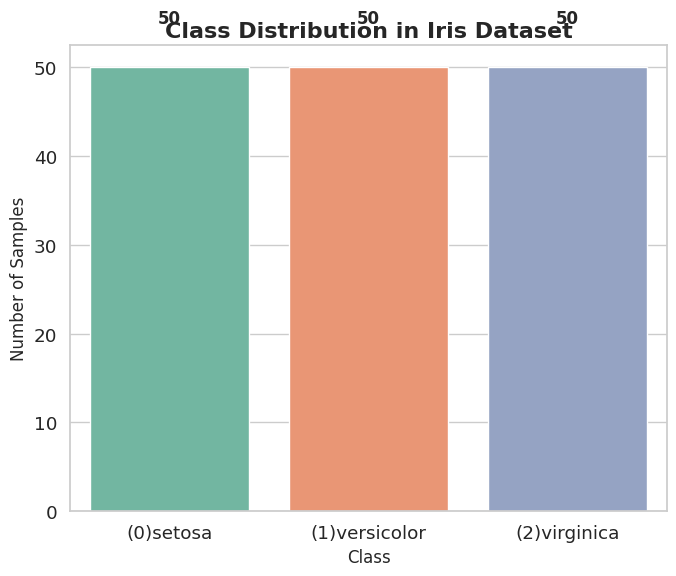

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


plt.figure(figsize=(7,6))
sns.countplot(x=y, palette="Set2")
plt.xticks([0,1,2], ['(0)setosa','(1)versicolor','(2)virginica'])
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Class Distribution in Iris Dataset', fontsize=16, weight='bold')
for i, count in enumerate(y.value_counts().sort_index()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


 A bar plot to visualize the distribution of the target classes (Iris species) in the dataset is generated.

 The dataset consists of a total of 150 samples, out of which 50 each are 'setosa', 'versicolor', 'virginica'.

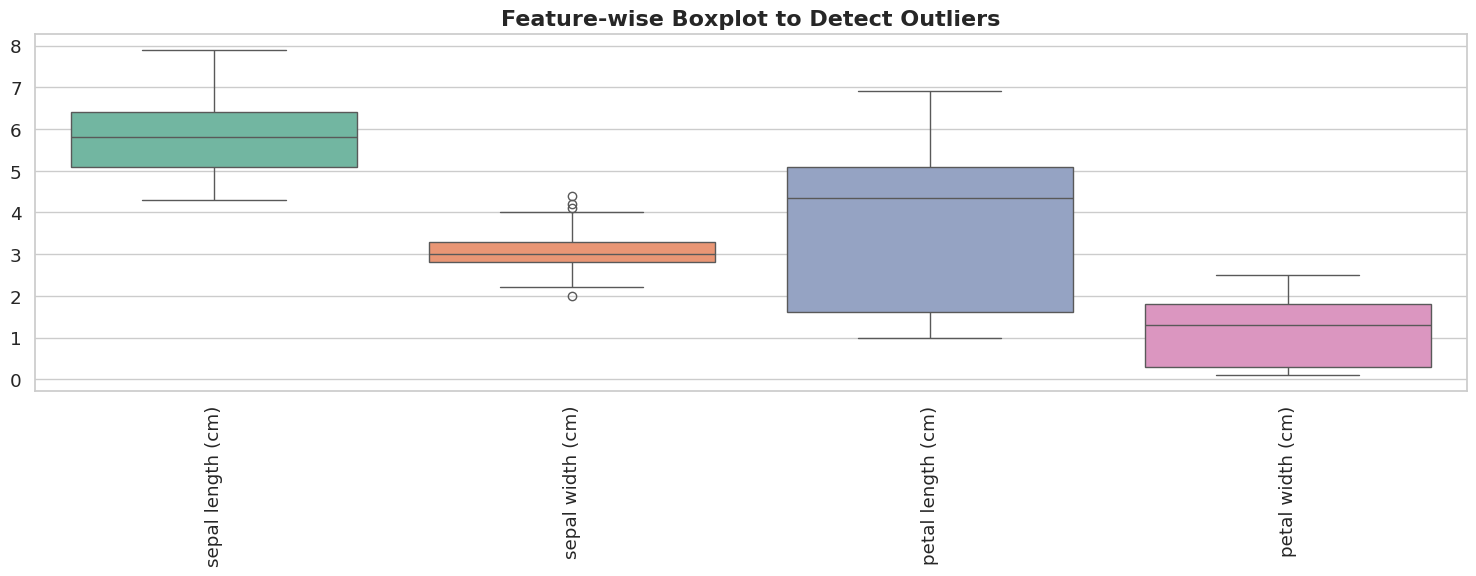

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


plt.figure(figsize=(15,6))
sns.boxplot(data=X, palette="Set2")
plt.xticks(rotation=90)
plt.title("Feature-wise Boxplot to Detect Outliers", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

A boxplot to visualize the distribution of each feature in the dataset and identify potential outliers is generated.

Each sample has four features: sepal length, sepal width, petal length, and petal width.

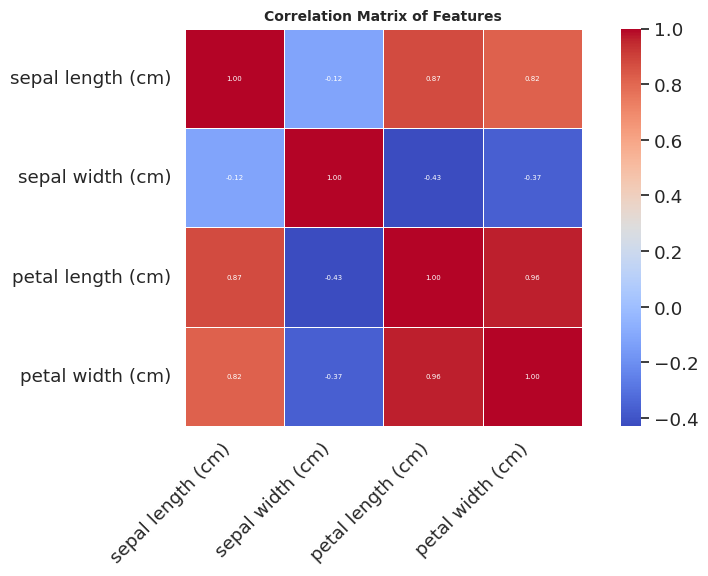

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(
    X.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    annot_kws={"size":5}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Features", fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We split the data into training and testing sets (80/20) while keeping class proportions consistent.

Then, we standardize the features so that all measurements contribute equally, which is crucial for distance-based algorithms like K-NN.

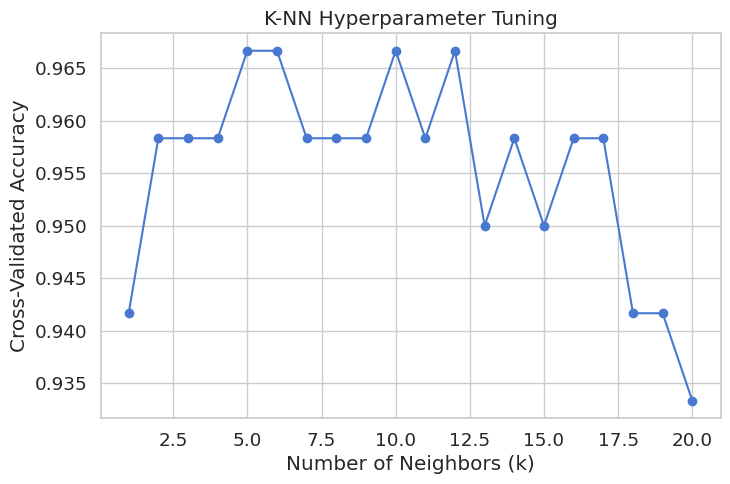

Best k: 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K-NN Hyperparameter Tuning')
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)



Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



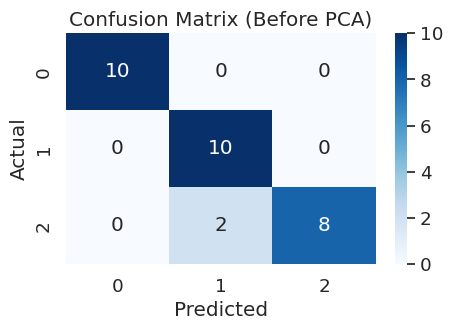

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Before PCA)')
plt.show()



We train the K-NN classifier using the best k on the original 4-dimensional data.

Model performance is evaluated using accuracy, classification report, and confusion matrix.

This serves as our baseline model before dimensionality reduction.

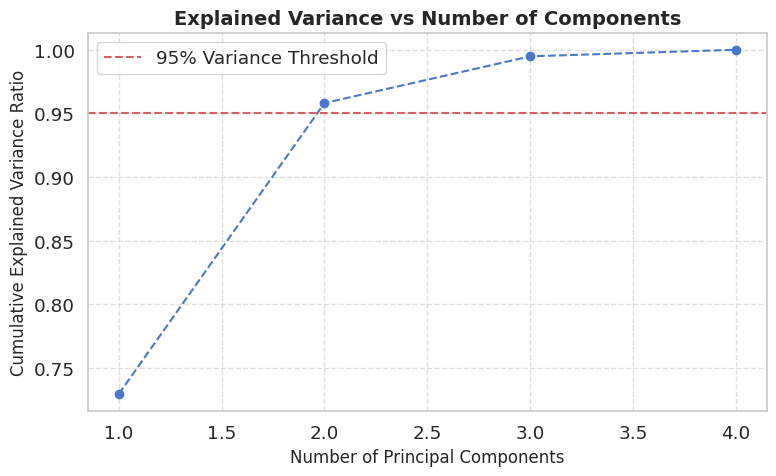

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_full = PCA()
pca_full.fit(X_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs Number of Components', fontsize=14, weight='bold')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()



PCA reduces the 4 original features to 2 principal components while preserving most of the variance.

We plot cumulative explained variance to check how many components capture most of the data’s information (e.g., 95% variance threshold).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72677234 0.23066667]


Accuracy after PCA: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



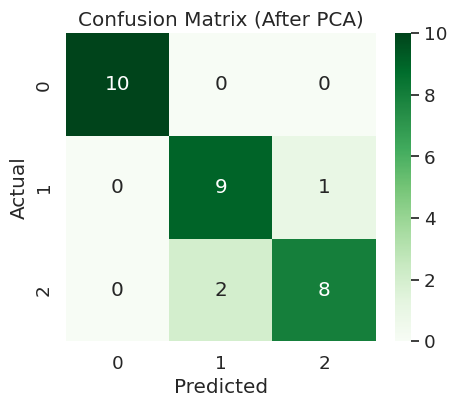

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After PCA)')
plt.show()

This confusion matrix shows the performance of the K-NN classifier after applying PCA with 2 components.

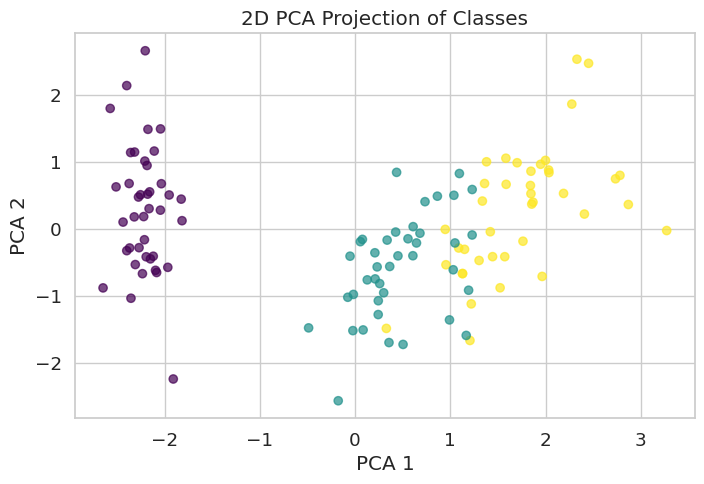

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D PCA Projection of Classes')
plt.show()

This scatter plot visualizes the data after applying PCA with 2 components. The different colors represent the different Iris species.

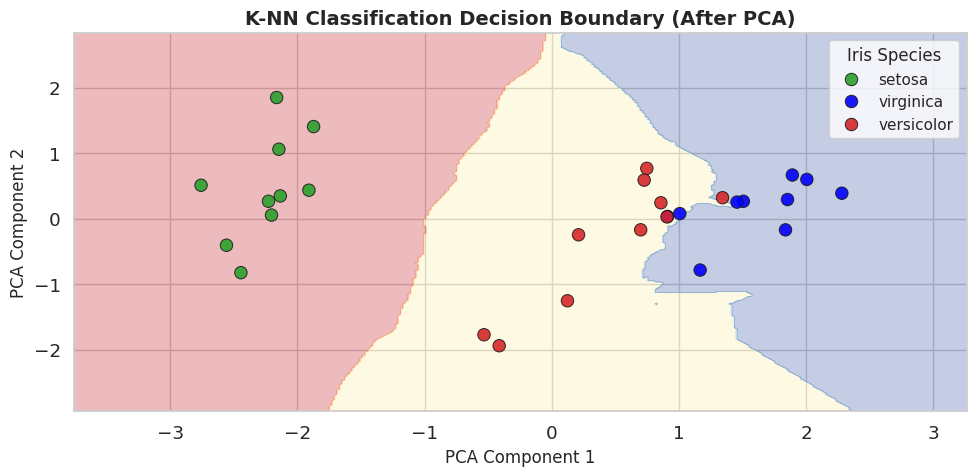

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_decision_boundary(model, X, y, title="Decision Boundary"):

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    label_map = {0:'setosa' ,1:'versicolor',2: 'virginica' }
    y_named = np.vectorize(label_map.get)(y)


    plt.figure(figsize=(10,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)


    sns.scatterplot(
        x=X[:,0], y=X[:,1],
        hue=y_named,
        palette={'setosa': '#2ca02c', 'versicolor': '#d62728','virginica':'blue'},
        s=80, edgecolor='k', alpha=0.9
    )

    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.title(title, fontsize=14, weight='bold')
    plt.legend(title='Iris Species', fontsize=11, title_fontsize=12)
    plt.tight_layout()
    plt.show()


plot_decision_boundary(knn_pca, X_test_pca, y_test, title="K-NN Classification Decision Boundary (After PCA)")

We plotted the 2D PCA projection of the training data to see how the classes are separated.

The decision boundary plot shows how the K-NN classifier divides the 2D space among the three classes.

Colors indicate Iris species: setosa (green), versicolor (red), virginica (blue).

